In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
p=pd.read_csv("/content/WorldCupMatches.csv")

In [51]:
print(p.isnull())#it is used to detect missing values in a DataFrame or Series
print("\n")
print(p.isnull().sum()) #This calculates and prints the total number of missing values for each column in dataFrame

      Year  Datetime  Stage  Stadium   City  Home Team Name  Home Team Goals  \
0    False     False  False    False  False           False            False   
1    False     False  False    False  False           False            False   
2    False     False  False    False  False           False            False   
3    False     False  False    False  False           False            False   
4    False     False  False    False  False           False            False   
..     ...       ...    ...      ...    ...             ...              ...   
847  False     False  False    False  False           False            False   
848  False     False  False    False  False           False            False   
849  False     False  False    False  False           False            False   
850  False     False  False    False  False           False            False   
851  False     False  False    False  False           False            False   

     Away Team Goals  Away Team Name  W

In [23]:
numerical= p.select_dtypes(include=['number'])
missing_numerical = numerical.isnull().sum()
print(missing_numerical)

Year                    3720
Home Team Goals         3720
Away Team Goals         3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
RoundID                 3720
MatchID                 3720
dtype: int64


In [40]:
missing_numerical.fillna(missing_numerical.mean(), inplace=True)

print(missing_numerical.isnull().sum())



0


In [42]:
missing_numerical.fillna(missing_numerical.median(), inplace=True)

print(missing_numerical.isnull().sum())

0


In [47]:
p=pd.read_csv("/content/WorldCupMatches.csv")


In [48]:
p.dropna(inplace=True)#to cleaning the null values
p.isnull().sum()

,0
Year,0
Datetime,0
Stage,0
Stadium,0
City,0
Home Team Name,0
Home Team Goals,0
Away Team Goals,0
Away Team Name,0
Win conditions,0


In [6]:
p.shape

(4572, 20)

In [5]:
p.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [7]:
p.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [9]:
print(p["Year"].max())
print(p["Year"].min())

2014.0
1930.0


In [85]:
p['Year'].corr(p['Attendance'])


0.3146976120654263

In [50]:
print(p[0:5])

     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

----------------------------------PLOTS-------------------------------

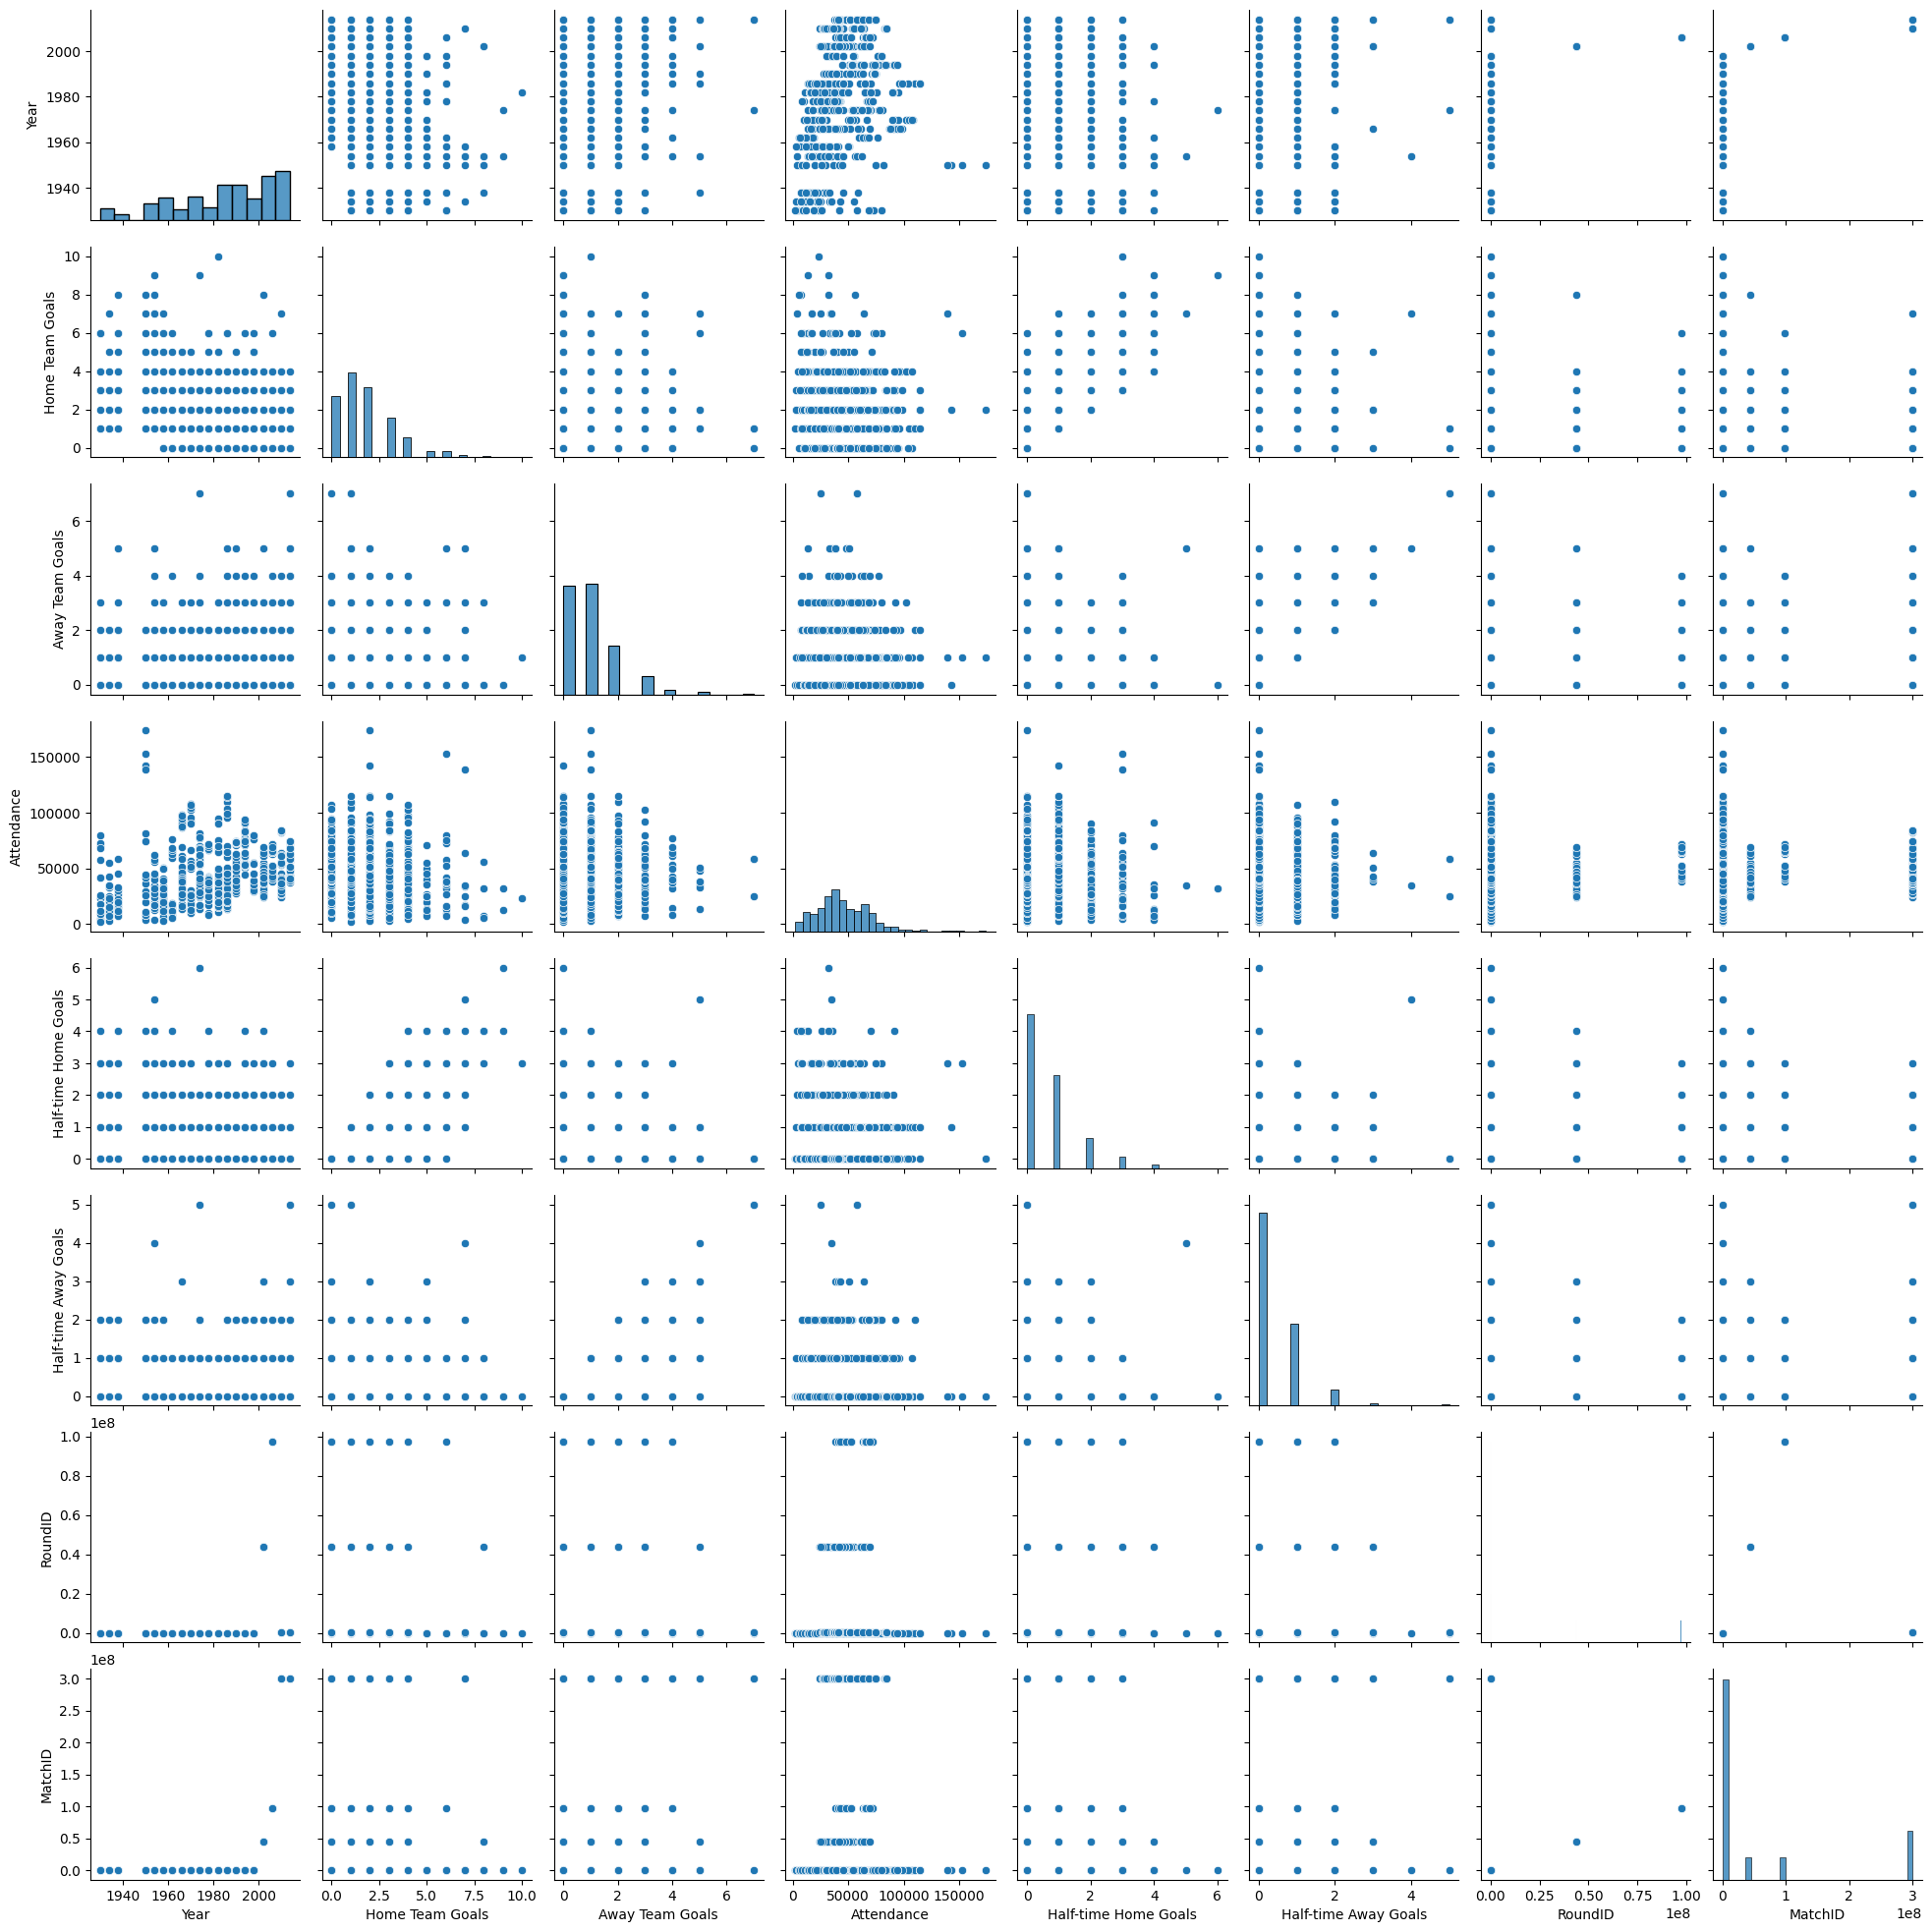

In [61]:
sns.pairplot(data=p)

<Axes: xlabel='Year', ylabel='Attendance'>

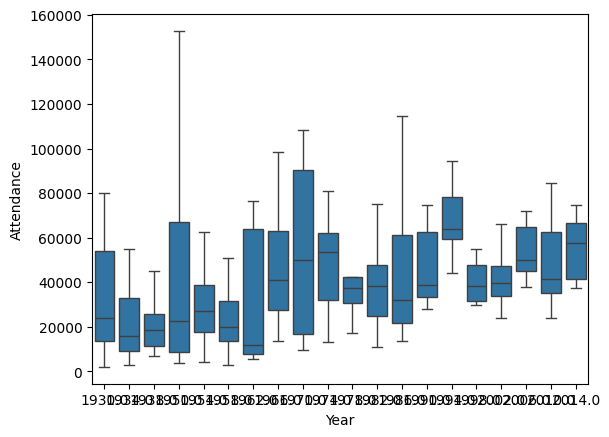

In [77]:
sns.boxplot(x='Year', y='Attendance', data=p, showfliers=False)

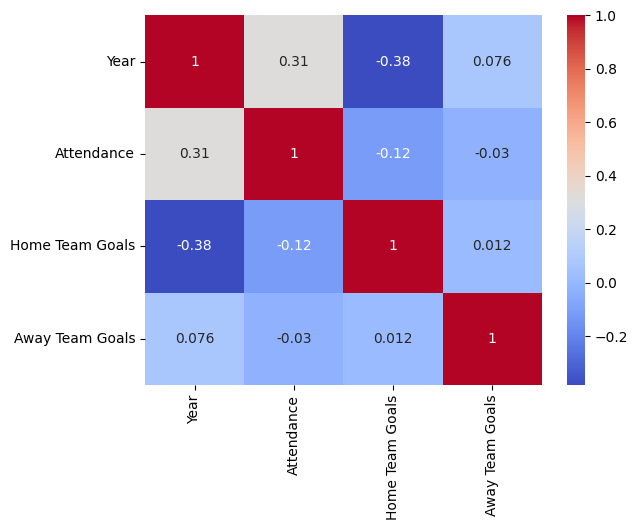

In [87]:
numericcolumns = ['Year', 'Attendance', 'Home Team Goals', 'Away Team Goals']
correlation = p[numericcolumns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Year', ylabel='Attendance'>

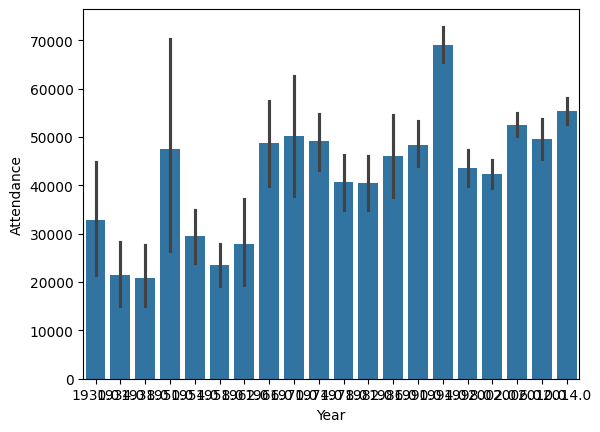

In [53]:
sns.barplot(x='Year', y='Attendance', data=p)

Text(0.5, 1.0, 'Histogram of Attendance')

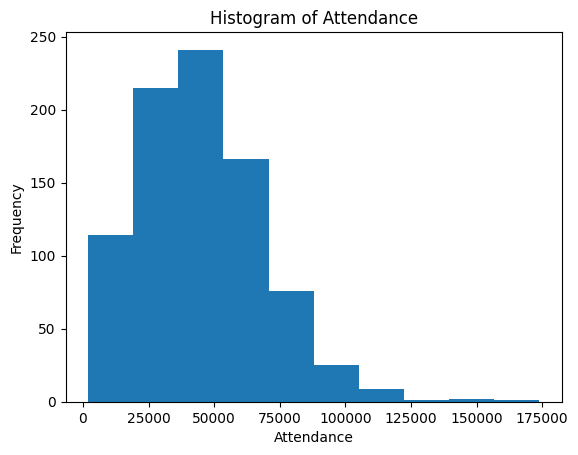

In [54]:
plt.hist(p['Attendance'], bins=10)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.title('Histogram of Attendance')

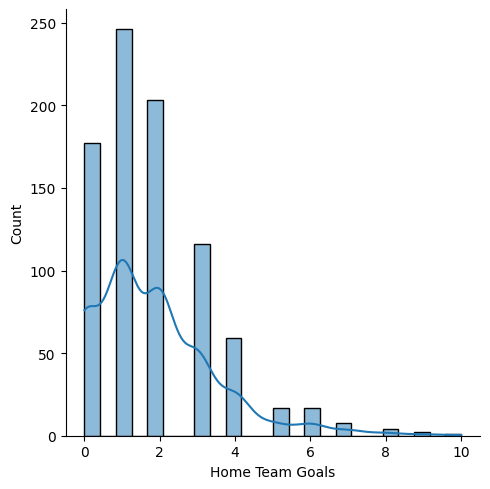

In [55]:
sns.displot(p['Home Team Goals'], kde=True)

Text(0.5, 1.0, 'Scatter Plot of Goals')

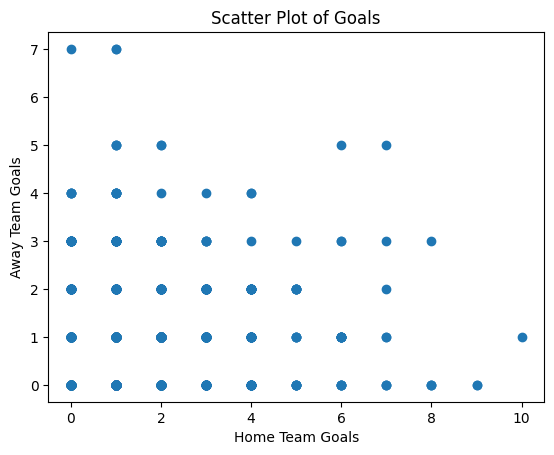

In [56]:
plt.scatter(p['Home Team Goals'], p['Away Team Goals'])
plt.xlabel('Home Team Goals')
plt.ylabel('Away Team Goals')
plt.title('Scatter Plot of Goals')